In [1]:
# https://https://tauday.com/tau-manifesto
from numpy import pi
τ = 2*pi

El objetivo de este documento es explorar los efectos de las maniobras en la orbita de un sistema satelital, de una manera gráfica y accesible para una persona externa.

En primer lugar debemos tener una manera de poder simular la orbita de un sistema satelital, como ejemplo se explica el caso bidimensional, sin embargo despues se utiliza un enfoque diferente para la simulación final. Si no es de tu interes las matemáticas de la dinámica orbital, puedes saltar la siguiente sección.

# Dinámica orbital

Como todo sistema dinámico, es posible analizarlo por medio de la energía que almacena el sistema, por lo que utilizaremos el enfoque de Euler-Lagrange para obtener las ecuaciones de movimiento del sistema. Para esto es necesario considerar las ecuaciones del Lagrangiano del sistema y de Euler-Lagrange:

\begin{equation}
L = K - U
\end{equation}

\begin{equation}
\frac{d}{dt}\left( \frac{\partial L}{\partial \dot{q}} \right) - \frac{\partial L}{\partial q} = 0
\end{equation}

En estas ecuaciones podemos notar en primer lugar, el Lagrangiano del sistema esta formado por la energía cinética del sistema y la energía potencial del sistema, estas energías son faciles de obtener con formulas que se enseñan en nivel medio superior.

Por otra parte la ecuación de Euler-Lagrange esta compuesta por derivadas aplicadas a este Lagrangiano del sistema con respecto de una variable $q$ que no conocemos; esta variable en realidad se le conoce como estado del sistema y para este caso en especifico, la podemos considerar como 

\begin{equation}
q = 
\begin{pmatrix}
r \\
\theta
\end{pmatrix}
\end{equation}

Escogemos $r$ y $\theta$ ya que las coordenadas cilíndricas nos darán ecuaciones mucho mas sencillas de leer; sin embargo los metodos numéricos utilizados en la práctica utilizan coordenadas en sistema cartesiano.

Recordando las ecuaciones de energía cinética y potencial, tenemos:

\begin{align}
K &= \frac{1}{2} m v^2 + \frac{1}{2} J \omega^2\\
U &= mgh
\end{align}

En donde podemos obtener que la velocidad traslacional del satelite $v = \dot{r}$, la velocidad rotacional del satelite $\omega = \dot{\theta}$, la masa del satelite la representamos con $m_s$, y consideramos al satelite como una masa puntual, por lo que su momento de inercia rotacional es $J = m_s r^2$

\begin{equation}
K = \frac{1}{2} m_s \dot{r}^2 + \frac{1}{2} m_s r^2 \dot{\theta}^2
\end{equation}

Y para obtener la energía potencial del sistema, solo sustituimos la aceleración con la obtenida por ley de gravitación universal y la altura con la distancia del satelite al centro de la tierra:

\begin{equation}
U = mgh = m_s \left( -\frac{G M_T}{r^2} \right) r = - \frac{G M_T m_s}{r}
\end{equation}

Empezaremos a utilizar código para definir valores importantes, por ejemplo la constante de gravitación universal se puede obtener de:

In [2]:
from scipy.constants import G

In [3]:
G

6.6743e-11

Tomando en cuenta las energías que calculamos, el Lagrangiano del sistema queda:

\begin{equation}
L = \frac{1}{2} m \dot{r}^2 + \frac{1}{2} m_s r^2 \dot{\theta}^2 + \frac{G M_T m_s}{r}
\end{equation}

Al cual tenemos que aplicarle las derivadas siguientes:

\begin{equation}
\frac{d}{dt}\left( \frac{\partial L}{\partial \dot{r}} \right) - \frac{\partial L}{\partial r} = 0
\end{equation}

\begin{equation}
\frac{d}{dt}\left( \frac{\partial L}{\partial \dot{\theta}} \right) - \frac{\partial L}{\partial \theta} = 0
\end{equation}

Afortunadamente, el Lagrangiano es lo suficientemente simple como para obtener facilmente las derivadas, y por lo tanto las ecuaciones de Euler-Lagrange del sistema se reducen a las siguientes:

\begin{align}
\ddot{r} &= r \dot{\theta}^2 - \frac{GM_T}{r^2} \\
\ddot{\theta} &= - \frac{2 \dot{r} \dot{\theta}}{r} \\
\end{align}

Con lo que concluimos con el desarrollo matemático del sistema.

# Simulación del ejemplo en dos dimensiones

Una vez que tenemos las ecuaciones de movimiento del sistema, las cuales obtuvimos al desarrollar la ecuación de Euler-Lagrange, tenemos lo necesario para crear una representación en código de la dinámica del sistema, sin embargo existe un problema que tiene que ver con la manera en que funcionan los sistemas de integración numérico como el que utilizaremos.

Existen métodos numéricos como el método de Euler o Runge-Kutta, los cuales estan enfocados en tomar un sistema de la forma:

\begin{equation}
\dot{x} = f(x, t)
\end{equation}

Sin embargo, la manera en que nuestro problema esta formulado es mas bien similar a:

\begin{equation}
\ddot{x} = f(x, \dot{x}, t)
\end{equation}

es decir, nuestro sistema de ecuaciones diferenciales es de segundo orden, no de primero.

El procedimiento para escribir nuestro problema en la primer forma, mas que un truco matemático es un cambio de perspectiva de nuestro problema, el primer paso consiste en escribir el estado de nuestro sistema con el doble de variables del que teniamos originalmente, es decir, si nuestro estado del sistema lo considerabamos como:

\begin{equation}
q =
\begin{pmatrix}
r \\
\theta
\end{pmatrix}
\end{equation}

entonces debemos escribirlo como:

\begin{equation}
x =
\begin{pmatrix}
r \\
\theta \\
\dot{r} \\
\dot{\theta}
\end{pmatrix}
\end{equation}

de tal manera que el nuevo estado del sistema no solo considera las variables originales, si no tambien sus derivadas.

> Nota: Si tuviera una ecuación diferencial de tercer orden, necesitaria tener un estado con las variables originales, sus derivadas y sus segundas derivadas.

Si ahora tratamos de escribir el problema que podemos resolver con métodos numéricos, obtendremos:

\begin{equation}
\dot{x} = f(x, t) =
\begin{pmatrix}
\dot{r} \\
\dot{\theta} \\
\ddot{r} \\
\ddot{\theta}
\end{pmatrix}
\end{equation}

lo que nos quiere decir, que para obtener la función $f(x, t)$ que tenemos que programar, necesitamos obtener las funciones:

\begin{equation}
\dot{x} = f(x, t) =
\begin{pmatrix}
\dot{r} \\
\dot{\theta} \\
\ddot{r} \\
\ddot{\theta}
\end{pmatrix} =
\begin{pmatrix}
f_1 (x, t) \\
f_2 (x, t) \\
f_3 (x, t) \\
f_4 (x, t)
\end{pmatrix}
\end{equation}

En donde cada una de las funciones que componen a $f(x, t)$, solo pueden tener como variables a estados del sistema $x$ o bien a $t$, pero revisando nuestras ecuaciones de la dinámica del sistema, ya tenemos estas ecuaciones:

\begin{equation}
\begin{matrix}
\ddot{r} = r \dot{\theta}^2 - \frac{GM_T}{r^2} \\
\ddot{\theta} = - \frac{2 \dot{r} \dot{\theta}}{r}
\end{matrix} \quad \implies
\begin{pmatrix}
\ddot{r} \\
\ddot{\theta}
\end{pmatrix} = 
\begin{pmatrix}
f_3(x, t) \\
f_4(x, t)
\end{pmatrix} =
\begin{pmatrix}
r \dot{\theta}^2 - \frac{GM_T}{r^2} \\
- \frac{2 \dot{r} \dot{\theta}}{r}
\end{pmatrix}
\end{equation}

en donde las varibles del estado del sistema $r$, $\theta$, $\dot{r}$ y $\dot{\theta}$ son las únicas variables involucradas.

>Nota: Los terminos $G$, $M_T$ y $2$ son constantes.

Para obtener las primeras dos funciones, es más fácil de lo que crees:

\begin{equation}
\begin{pmatrix}
\dot{r} \\
\dot{\theta}
\end{pmatrix} = 
\begin{pmatrix}
f_1(x, t) \\
f_2(x, t)
\end{pmatrix} =
\begin{pmatrix}
\dot{r} \\
\dot{\theta}
\end{pmatrix}
\end{equation}

ya que los terminos $\dot{r}$ y $\dot{\theta}$ son parte del estado del sistema.

Con esto tenemos una representación completa del sistema de tal manera que sea una ecuación diferencial de primer orden:

\begin{equation}
\dot{x} = f(x, t) =
\begin{pmatrix}
\dot{r} \\
\dot{\theta} \\
\ddot{r} \\
\ddot{\theta}
\end{pmatrix} =
\begin{pmatrix}
f_1 (x, t) \\
f_2 (x, t) \\
f_3 (x, t) \\
f_4 (x, t)
\end{pmatrix} = 
\begin{pmatrix}
f_1(x, t) \\
f_2(x, t) \\
f_3(x, t) \\
f_4(x, t)
\end{pmatrix} =
\begin{pmatrix}
\dot{r} \\
\dot{\theta} \\
r \dot{\theta}^2 - \frac{GM_T}{r^2} \\
- \frac{2 \dot{r} \dot{\theta}}{r}
\end{pmatrix}
\end{equation}

y poder representarlo con una función en nuestro código:

In [4]:
def satelite(t, x, u, params):
    M = params.get("masa_tierra", 5.9736e24)
    
    ΔV = u
    r, θ, ṙ, θ̇ = x
    
    Δω = ΔV/r
    
    ṙ = ṙ
    θ̇ = θ̇ + Δω
    
    r̈ = r*(θ̇**2) - (G*M)/(r**2)
    θ̈ = - (2*ṙ*θ̇)/r
    
    return [ṙ, θ̇, r̈, θ̈]

Aqui podemos hacer varias anotaciones, la función ```sistema_satelital```, toma como entrada los parametros ```t```, ```x```, ```u``` y ```params```, los cuales corresponden al tiempo, estado del sistema, señal de entrada y parametros.

La señal de entrada ```u``` la utilizaremos para proporcionarle un impulso de velocidad en el sentido en el que gira nuestro satelite, por eso es que en el código se agrega esta cantidad a la velocidad de rotación de nuestro satelite, sin embargo empezaremos simulando el caso en el que esta energía de entrada es nula.

In [5]:
from control import NonlinearIOSystem, input_output_response

io_satelite = NonlinearIOSystem(satelite, None,
                                inputs=("ΔV"),
                                outputs=("r", "θ", "ṙ", "θ̇"),
                                states=("r", "θ", "ṙ", "θ̇"),
                                name="satelite")

Utilizaremos la librería de control para demostrar una funcionalidad especifica, sin embargo existen varias opciones para simular un sistema como el que creamos como los métodos ```ode``` u ```odeint``` de la librería ```scipy.integrate```, de cualquier manera, utilizamos nuestra función y la damos de alta con los nombres de las entradas, salidas, estados y un nombre para utilizarlo en las llamadas internas.

Lo siguiente que necesitamos es definir el estado inicial del sistema:

In [6]:
rₒ = 42164e3  # 42,164 km es el radio de una orbita geosíncrona
rₑ =  6378e3  #  6,378 km es el radio medio de la tierra
vₒ =  3074.6  #  3,074.6 m/s es la velocidad de cuerpos en orbita geosíncrona

In [7]:
ωₒ = vₒ/rₒ     # Velocidad rotacional de orbita geosíncrona
Tₒ = 24*60*60 # Periodo de orbita geosíncrona en segundos

Definimos tanto los tiempos en que queremos obtener el estado del sistema (nuestra simulación), la señal de entrada en esos tiempos (en este caso solo $0$) y el estado inicial del sistema:

In [8]:
from numpy import linspace, array

ts = linspace(0, 1*Tₒ, 100000)
us = array([0 for t in ts])
inis = [rₒ, 0, 0, ωₒ]

Y obtenemos el estado del sistema en cada uno de esos tiempos:

In [9]:
t, X = input_output_response(sys=io_satelite, T=ts, U=us, X0=inis)
r, θ, ṙ, θ̇ = X

Podemos graficar cada una de esas variables:

In [10]:
from matplotlib.pyplot import figure, rcParams, Circle
from conf_matplotlib import conf_matplotlib_claro
conf_matplotlib_claro()

In [11]:
from numpy import degrees

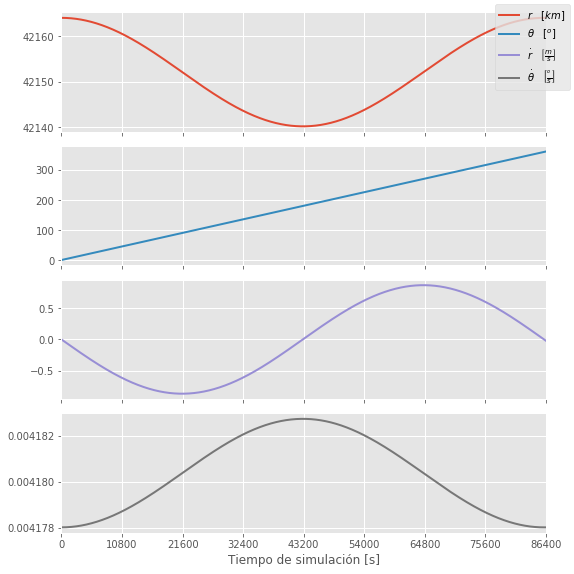

In [12]:
fig = figure(figsize=(8,8))
ax1, ax2, ax3, ax4 = fig.subplots(4, 1, sharex='all',
                                  gridspec_kw={'height_ratios': [1, 1, 1, 1]})
cycle = rcParams['axes.prop_cycle'].by_key()['color']

ax1.plot(t, r/1000, c=cycle[0],
         label=r"$r \quad [km]$")
ax2.plot(t, degrees(θ), c=cycle[1],
         label=r"$\theta \quad [^o]$")
ax3.plot(t, ṙ, c=cycle[2],
         label=r"$\dot{r} \quad \left[\frac{m}{s}\right]$")
ax4.plot(t, degrees(θ̇), c=cycle[3],
         label=r"$\dot{\theta} \quad \left[\frac{^o}{s}\right]$")

ax1.ticklabel_format(style="plain")

ax4.set_xlim(t[0], t[-1])
ax4.set_xticks(linspace(t[0], t[-1], 9))
ax4.set_xlabel(r"Tiempo de simulación [s]")

fig.legend()
fig.tight_layout();

o bien, generar una gráfica mas representativa de nuestra orbita:

In [13]:
from numpy import sin, cos

px = [a*cos(b)/1000 for a, b in zip(*[r, θ])]
py = [a*sin(b)/1000 for a, b in zip(*[r, θ])]

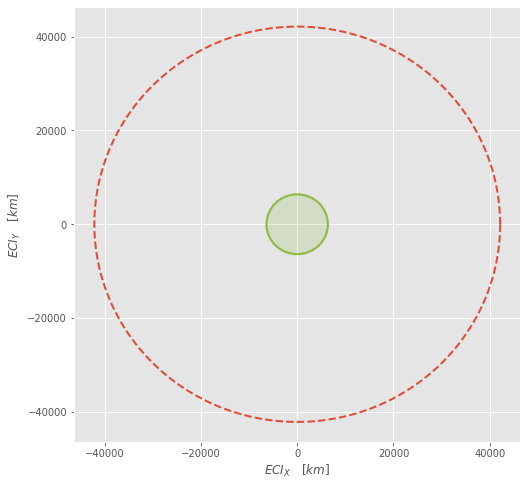

In [14]:
fig = figure(figsize=(8,8))
ax = fig.gca()
ax.plot(px, py, "--")

c = Circle((0, 0), rₑ/1000, color=cycle[5], fill=False, lw=2)
ax.add_artist(c)
c = Circle((0, 0), rₑ/1000, color=cycle[5], alpha=0.2, fill=True, lw=2)
ax.add_artist(c)

ax.set_xlabel(r"$ECI_X \quad [km]$")
ax.set_ylabel(r"$ECI_Y \quad [km]$");

---

Lo siguiente que podemos hacer, es crear una función para modelar el comportamiento del sistema de control, el cual le dira al satelite que aplique un $\Delta V$ dependiendo del tiempo de simulación:

In [15]:
def controlador(t, x, u, params):
    Tₒ = params.get("periodo_orbital", 24*60*60)
    
    if Tₒ < t < Tₒ*1.125:
        ΔV = 100
    else:
        ΔV = 0
    
    return ΔV

In [16]:
io_controlador = NonlinearIOSystem(None, controlador,
                                   inputs=(),
                                   outputs=("ΔV"),
                                   name="controlador")

Y definir un sistema que contenga al satelite y al controlador, conectando la salida del controlador, con la entrada del satelite:

In [17]:
from control import InterconnectedSystem

sistemas   = [io_controlador, io_satelite]
conexiones = [["satelite.ΔV", "controlador.ΔV"]]
salidas    = ["satelite.r", "satelite.θ"]
sistema_satelital = InterconnectedSystem(syslist=sistemas,
                                         connections=conexiones,
                                         outlist=salidas)

Lo simulamos por tres periodos orbitales:

In [18]:
ts = linspace(0, 3*Tₒ, 10000)
us = array([0 for t in ts])
inis = [rₒ, 0, 0, ωₒ]

t, X = input_output_response(sys=sistema_satelital, T=ts, X0=inis)
r, θ = X

Y graficamos su comportamiento:

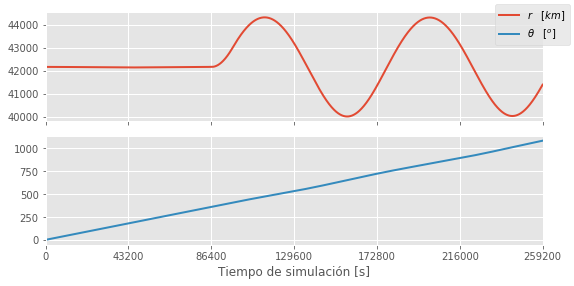

In [19]:
fig = figure(figsize=(8,4))
ax1, ax2 = fig.subplots(2, 1, sharex='all',
                        gridspec_kw={'height_ratios': [1, 1]})
cycle = rcParams['axes.prop_cycle'].by_key()['color']

ax1.plot(t, r/1000, c=cycle[0], label=r"$r \quad [km]$")
ax2.plot(t, degrees(θ), c=cycle[1], label=r"$\theta \quad [^o]$")

ax1.ticklabel_format(style="plain")

ax2.set_xlim(t[0], t[-1])
ax2.set_xticks(linspace(t[0], t[-1], 7))
ax2.set_xlabel(r"Tiempo de simulación [s]")

fig.legend()
fig.tight_layout();

In [20]:
px = [a*cos(b)/1000 for a, b in zip(*[r, θ])]
py = [a*sin(b)/1000 for a, b in zip(*[r, θ])]

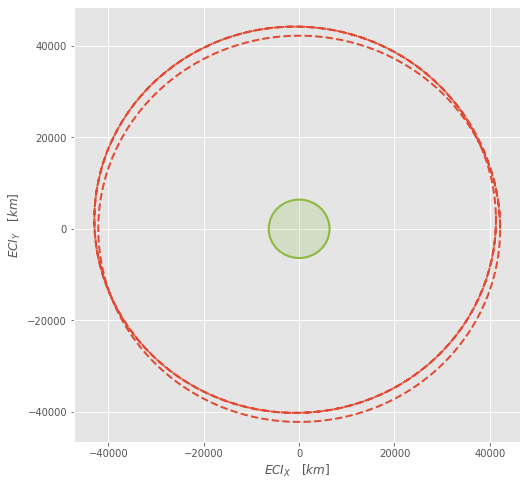

In [21]:
fig = figure(figsize=(8,8))
ax = fig.gca()
ax.plot(px, py, "--")

c = Circle((0, 0), rₑ/1000, color=cycle[5], fill=False, lw=2)
ax.add_artist(c)
c = Circle((0, 0), rₑ/1000, color=cycle[5], alpha=0.2, fill=True, lw=2)
ax.add_artist(c)

ax.set_xlabel(r"$ECI_X \quad [km]$")
ax.set_ylabel(r"$ECI_Y \quad [km]$");

Como en esta simulación partimos de un sistema con una orbita muy crecana a circular, esta maniobra en lugar de corregir la excentricidad, la empeoró; sin embargo es facil ver el efecto que tuvo esta maniobra sobre de la orbita del nuestro sistema.

Una vez que realizamos este ejercicio podemos hacer las siguientes anotaciones:

* Es un ejercicio util para ejercitar conceptos de programación, física y matemáticas, sin embargo...
* **No** nos da una representación completa de nuestro sistema, incluso si adaptaramos estas ecuaciones para considerar el caso de tres dimensiones, aun no estariamos considerando perturbaciones a la orbita como las creadas por el sol y la luna, la presión por radiación solar, etc.

Para crear un modelo que nos pueda dar una trayectoria mas acercada a la realidad, podemos considerar librerías creadas por terceros.

---

# Simulación de ejemplo en tres dimensiones

Para la simulación en tres dimensiones, utilizaremos dos librerías basicamente, ```astropy``` y ```poliastro```.

```astropy``` nos provee funciones, constantes y clases que nos servirán para el manejo de las coordenadas y épocas en los diferentes marcos de referencia involucrados. Su documentación se puede encontrar en [https://docs.astropy.org/en/stable/](https://docs.astropy.org/en/stable/).

```poliastro``` por el otro lado, nos provee clases y funciones relacionadas con la representación y propagación de órbitas. Su documentación se puede encontrar en [https://docs.poliastro.space/en/stable/](https://docs.poliastro.space/en/stable/)

Empezaremos descargando un conjunto de efemérides generadas por JPL (NASA Jet Propulsion Laboratory) las cuales nos servirán para determinar las distancias en cada momento entre nuestros cuerpos de estudio:

In [22]:
from astropy.coordinates import solar_system_ephemeris
solar_system_ephemeris.set("de432s");

Esta importación de las efemérides no es estrictamente necesaria, de no ser utilizada el motor de propagación utilizará aproximaciones de las posiciones de los cuerpos que le pedimos, sin embargo no es dificil simplemente importarlas y se pueden evitar si es que no se cuenta con una conexion a internet que lo permita.

Lo siguiente que haremos es escribir los parámetros orbitales premaniobra que se encuentran en el archivo de argumentos de la maniobra EWSK0398, con esto tendremos la órbita de nuestro satelite perfectamente determinada:

In [23]:
from astropy.time import Time, TimeDelta
from astropy import units as u
# Parametros iniciales de la orbita
# Efemérides Premaniobra de Argument File EWSK0398
epoch = Time(2000, format='jyear') + TimeDelta(638594520*u.s)
r     = [21688591.8, -36154596.3, -22139.6363]*u.m
v     = [2636.61379, 1582.13661, -5.16579754]*u.m/u.s

Para utilizar la libreria ```poliastro```, debemos meter estos valores en un objeto de la clase ```Orbit```:

In [24]:
from poliastro.twobody import Orbit
from poliastro.bodies import Earth, Moon, Sun
# Se define un objeto con los parametros de la orbita inicial
orbita_inicial = Orbit.from_vectors(Earth, r=r, v=v,
                                    epoch=Time(epoch, format="jyear"))
# Se define un segundo objeto con los mismos parametros, este
# objeto es al que se le aplicará la maniobra en realidad y se
# conservan ambos para comparar los resultados
orbita_final   = orbita_inicial

Lo siguiente que haremos será definir los parametros de la maniobra:

In [25]:
# Parametros de la maniobra
ΔV            = 0.035078249*u.m/u.s
thruster_secs = 26.88*u.s
duty_cycle    = 0.112*u.one
downtime      = 1 - 0.112
thruster_eff  = 1*u.one

duration      = thruster_secs / duty_cycle
δv            = ΔV/int(duration.value)

Tomando en cuenta que esta maniobra no se aplicará en la época de las efemérides pre-maniobra, calculamos el tiempo que tenemos que adelantar para la época de la maniobra:

In [26]:
from datetime import datetime, timedelta
# Época de la maniobra
mnvr_epoch = datetime(2020, 3, 27, 16, 37, 5)
ff_time    = (mnvr_epoch - epoch.datetime).seconds
ts         = TimeDelta(linspace(0*u.s, ff_time*u.s, int(ff_time)))

Por otro lado, tambien debemos definir parametros de la simulación, para empezar definiremos dos funciones ```moon_r``` y ```sun_r``` las cuales interpolarán las distancias a estos cuerpos desde nuestro satelite, de tal manera que con esto podemos calcular su efecto sobre nuestra orbita.

In [27]:
# Parametros de la simulación
inicio = (orbita_inicial.epoch).jd*u.day
final  = inicio + 15*u.day

from poliastro.ephem import build_ephem_interpolant
# Funciones de interpolación para efemérides de cuerpos externos
moon_r = build_ephem_interpolant(Moon, 28 * u.day, (inicio, final))
sun_r  = build_ephem_interpolant(Sun, 365 * u.day, (inicio, final))

La función que define las perturbaciones utilzará funciones auxiliares de ```poliastro```, las cuales toman como argumento algunas constantes de los cuerpos y algunos valores especificos del satelite:

In [28]:
from poliastro.core.perturbations import J2_perturbation, J3_perturbation
from poliastro.core.perturbations import third_body, radiation_pressure
# Función que define las perturbaciones a considerar en la simulación
def perturbaciones(t0, state, k):
    
    J2 = Earth.J2.value
    J3 = Earth.J3.value
    R  = Earth.R.to(u.km).value
    CR = 0.0257331490 # Valor estimado por OASYS
    A  = 1e-5
    Wc = Sun.Wdivc.value
    moon_k = Moon.k.to(u.km**3/u.s**2).value
    sun_k  = Sun.k.to(u.km**3/u.s**2).value
    
    pert  = J2_perturbation(t0=t0, state=state, k=k, J2=J2, R=R)
    pert += J3_perturbation(t0=t0, state=state, k=k, J3=J3, R=R)
    
    pert += radiation_pressure(t0=t0, state=state, k=k, R=R, C_R=CR,
                               A=A, m=1, Wdivc_s=Wc, star=sun_r)
    
    pert += third_body(t0=t0, state=state, k=k,
                       k_third=moon_k, third_body=moon_r)
    pert += third_body(t0=t0, state=state, k=k,
                       k_third=sun_k, third_body=sun_r)
    
    return pert

Una vez que hemos definido todos estos parametros, podemos propagar las orbitas y obtener la posición de nuestro satelite; en primer lugar lo hacemos para adelantar el tiempo hasta la época de ignición de la maniobra:

In [29]:
from poliastro.twobody.propagation import propagate, cowell

# La función propagate toma como argumentos un objeto de la clase Orbit,
# los tiempos de propagación de la orbita, el método numérico a utilizar
# y la función que define las perturbaciones a considerar, y devuelve un
# conjunto de coordenadas cartesianas por cada tiempo dado
c0_pre = propagate(orbita_inicial, ts, method=cowell, ad=perturbaciones)

# El método propagate de la clase Orbit toma como argumentos un tiempo al
# cual propagar la orbita, el método numérico a utilizar y la función que
# define las perturbaciones a considerar y devuelve un objeto Orbit con
# orbita propagada para el tiempo dado
orbita_inicial = orbita_inicial.propagate(ff_time*u.s, method=cowell,
                                          ad=perturbaciones)

# La función propagate toma como argumentos un objeto de la clase Orbit,
# los tiempos de propagación de la orbita, el método numérico a utilizar
# y la función que define las perturbaciones a considerar, y devuelve un
# conjunto de coordenadas cartesianas por cada tiempo dado
cf_pre = propagate(orbita_final, ts, method=cowell, ad=perturbaciones)

# El método propagate de la clase Orbit toma como argumentos un tiempo al
# cual propagar la orbita, el método numérico a utilizar y la función que
# define las perturbaciones a considerar y devuelve un objeto Orbit con
# orbita propagada para el tiempo dado
orbita_final   = orbita_final.propagate(ff_time*u.s, method=cowell,
                                        ad=perturbaciones)

---

Ahora que nuestra orbita se encuentra en la época correcta para aplicar la maniobra, utilizaremos la clase ```Maneuver``` para definir objetos que nos servirán para definir cada uno de los impulsos de la maniobra EWSK0398, aplicarlos a la orbita, propagar el tiempo de descanso de los propulsores y obtener las coordenadas de la orbita en esa época:

In [30]:
from poliastro.maneuver import Maneuver
from poliastro.util import norm

cf_dur = []
for i in range(int(duration.value)):
    thruster_vec = (orbita_final.v/norm(orbita_final.v)).value*δv
    mnvr = Maneuver((duty_cycle*u.s, thruster_vec))
    
    orbita_final = orbita_final.apply_maneuver(mnvr)
    orbita_final = orbita_final.propagate(downtime*u.s, method=cowell,
                                          ad=perturbaciones)
    cf_dur.append(propagate(orbita_inicial, TimeDelta(0), method=cowell,
                            ad=perturbaciones))

Una vez terminada la maniobra, propagamos la orbita inicial hasta el punto en que se encuentra la orbita en que si se aplicó la maniobra, para comparar los efectos de la maniobra:

In [31]:
c0_dur = []

ep_diff = orbita_final.epoch.datetime - orbita_inicial.epoch.datetime
ts    = TimeDelta(linspace(0*u.s, ep_diff.seconds*u.s, int(ep_diff.seconds)))

c0_dur = propagate(orbita_inicial, ts, method=cowell, ad=perturbaciones)
orbita_inicial = orbita_inicial.propagate(ep_diff.seconds*u.s, method=cowell,
                                          ad=perturbaciones)

---

Ahora que la maniobra se ha terminado, se decide propagar las orbitas por dos semanas para hacer mas evidente el efecto de la maniobra:

In [32]:
ts = TimeDelta(linspace(0*u.s, 1*u.week, 10000))

In [33]:
c0_pos = propagate(orbita_inicial, ts, method=cowell, ad=perturbaciones)
cf_pos = propagate(orbita_final,   ts, method=cowell, ad=perturbaciones)

In [34]:
orbita_inicial = orbita_inicial.propagate(ts[-1], method=cowell,
                                          ad=perturbaciones)

orbita_final   = orbita_final.propagate(ts[-1], method=cowell,
                                          ad=perturbaciones)

---

Ya que hemos terminado con la propagación de efemérides, el siguiente paso es convertir las coordenadas cartesianas que obtuvimos del propagador, a coordenadas en un marco de referencia que nos sirva más para visualizar nuestro satelite, en este caso convertiremos del sistema ICRS (International Celestial Reference System) al GCTE (Geocentric True Ecliptic):

In [35]:
from astropy.coordinates import SkyCoord

gcte_0_pre = SkyCoord(c0_pre).geocentrictrueecliptic
gcte_f_pre = SkyCoord(cf_pre).geocentrictrueecliptic

gcte_0_dur = SkyCoord(c0_dur).geocentrictrueecliptic
gcte_f_dur = SkyCoord(cf_dur).geocentrictrueecliptic

gcte_0_pos = SkyCoord(c0_pos).geocentrictrueecliptic
gcte_f_pos = SkyCoord(cf_pos).geocentrictrueecliptic

Y estas coordenadas en GCTE contienen atributos ```lon``` y ```lat```, los cuales utilizaremos para gráficar nuestra caja de control:

In [36]:
lons_0  = [coord.lon.value for coord in gcte_0_pre]
lats_0  = [coord.lat.value for coord in gcte_0_pre]
lons_f  = [coord.lon.value for coord in gcte_f_pre]
lats_f  = [coord.lat.value for coord in gcte_f_pre]

lons_0 += [coord.lon.value for coord in gcte_0_dur]
lats_0 += [coord.lat.value for coord in gcte_0_dur]
lons_f += [coord.lon.value for coord in gcte_f_dur]
lats_f += [coord.lat.value for coord in gcte_f_dur]

lons_0 += [coord.lon.value for coord in gcte_0_pos]
lats_0 += [coord.lat.value for coord in gcte_0_pos]
lons_f += [coord.lon.value for coord in gcte_f_pos]
lats_f += [coord.lat.value for coord in gcte_f_pos]

---

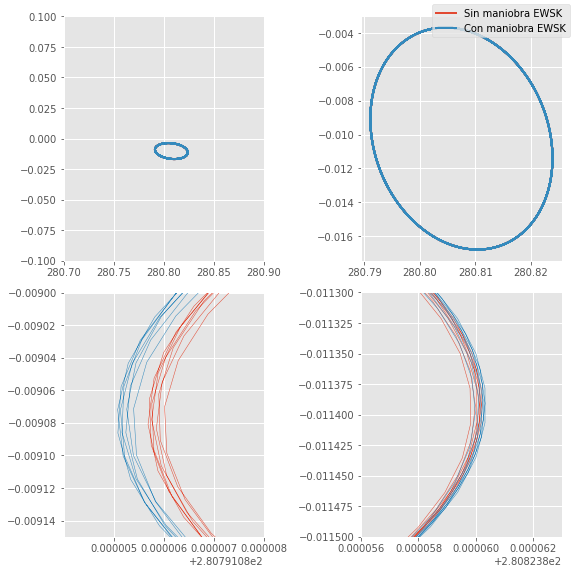

In [37]:
fig = figure(figsize=(8,8))
[ax1, ax2], [ax3, ax4]  = fig.subplots(2,2)

ax1.plot(lons_0, lats_0)
ax1.plot(lons_f, lats_f)
ax1.set_xlim(280.7, 280.9)
ax1.set_ylim(-0.1, 0.1)

ax2.plot(lons_0, lats_0, label="Sin maniobra EWSK")
ax2.plot(lons_f, lats_f, label="Con maniobra EWSK")

ax3.plot(lons_0, lats_0, lw=0.5)
ax3.plot(lons_f, lats_f, lw=0.5)
ax3.set_xlim(280.791084, 280.791088)
ax3.set_ylim(-0.00915, -0.009)

ax4.plot(lons_0, lats_0, lw=0.5)
ax4.plot(lons_f, lats_f, lw=0.5)
ax4.set_xlim(280.823856, 280.823863)
ax4.set_ylim(-0.0115, -0.0113)

fig.legend()
fig.tight_layout();

In [38]:
from poliastro.plotting import OrbitPlotter2D, OrbitPlotter3D
from poliastro.plotting import StaticOrbitPlotter

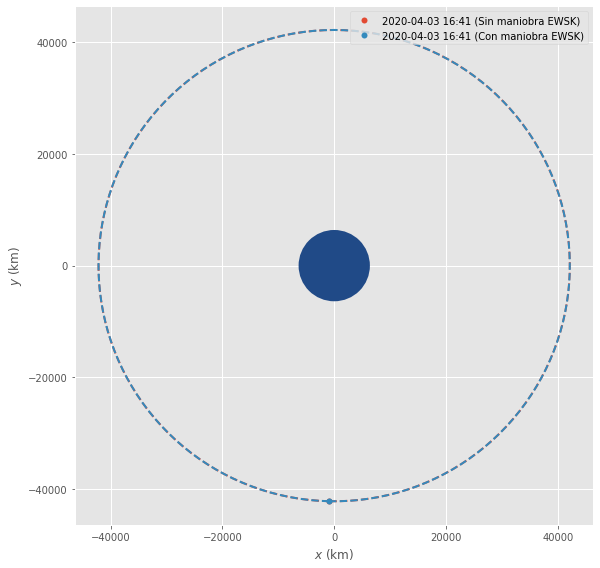

In [39]:
fig = figure(figsize=(8,8))
ax = fig.gca()
op = StaticOrbitPlotter(ax)

op.plot(orbita_inicial, label="Sin maniobra EWSK")
op.plot(orbita_final, label="Con maniobra EWSK")
ax.get_legend().remove();
fig.tight_layout()
ax.legend(loc="upper right");

In [40]:
import plotly.graph_objects as go

In [41]:
fig = go.Figure()

op = OrbitPlotter3D(fig)

op.plot(orbita_inicial, label="Sin maniobra EWSK")
op.plot(orbita_final, label="Con maniobra EWSK")

fig.update_layout(legend=dict(x=0, y=1))

In [42]:
fig = go.Figure()

op = OrbitPlotter3D(fig)

op.set_attractor(Earth)
op.plot_trajectory(c0_pre, label="Trayectoria pre Maniobra")
op.plot_trajectory(c0_dur, label="")
op.plot_trajectory(c0_pos)

#op.plot_trajectory(cf_pre)
#op.plot_trajectory(cf_dur)
op.plot_trajectory(cf_pos)

fig.update_layout(legend=dict(x=0, y=1))